In [1]:
import matplotlib.patches as patches

# 問題1

### 数式的な理解
もともとの数式は
$$
y_1 = 3x + 4
$$
この式の両辺に$-1$をかけた式を$y_2$とすると、分配法則より以下の様に展開できる。
$$
\begin{align}
y_2 =& - (3x + 4) \\
=&-3x -4
\end{align}
$$

### グラフによる理解
$y_1$式と$y_2$式をプロットすると下図のようになる。
つまり、式全体に$-1$をかけるということは、
X軸に対して対称な点に値を移すことに相当する(線対称)。
もともとの数式$y_1 = 3x+4$では$y$切片は$+4$になるが、
これが$X$軸に対して線対称な点に移されると$-4$となる。


In [2]:
x = np.linspace(-3, 3, 100)
y1 = 3*x + 4
y2 = -(3*x + 4)

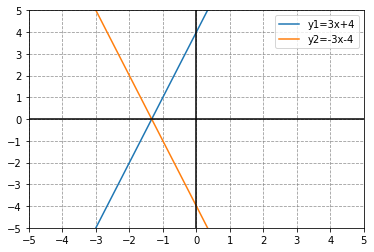

In [3]:
# plot
plt.plot(x, y1, label='y1=3x+4')
plt.plot(x, y2, label='y2=-3x-4')
plt.xticks(np.arange(-5,5+1,1))
plt.yticks(np.arange(-5,5+1,1))
plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.grid(color='gray', alpha=0.8, ls='dashed')
plt.ylim(-5, 5)
plt.legend()
plt.show()

# 問題8
簡単のために地球の形状を真円とし、時間的な形状変化等は考えないことにする。

地球の半径を$R[m]$とすると,赤道上に高さ$=0$で敷設したロープ長さは
半径Rの円周$L$に等しいため、$L$は
$$
L=2 \pi R[m]
$$
と求まる。

ここで ロープの長さを1m長くしたときの長さを$L'$とすると
$$
\begin{align}
L' =& L + 1 \\
   =& 2 \pi R + 1
\end{align}
$$
この時地上からどれだけ離れるかというのが聞かれているないようなので、地上から離れた距離を$r[m]$とすると、次の式が成り立つ
$$
\begin{align}
2 \pi (R + r) = L' =& 2 \pi R + 1 \\
2 \pi R + 2 \pi r =& 2 \pi R + 1 \\
2 \pi r = 1 \\
\therefore r = \frac{1}{2 \pi}
\end{align}
$$
${1}/{2\pi}$はざっくり$0.1571[m]$になる。

つまりこの問題は半径がいくらであろうと(地球であろうと、ゴルフボールであろうと)、
ロープの長さは16cmだけ離れる、ということを言っている。
直感に反する結果が出るところが、この問題の面白いところ(と先生は思わせたい)。
これが本当かはパパにはよくわからない。なんとも直感に反する結果。実験して
確かめてみたいなと思うけど、ネットで検索したら、テレビ番組で検証したという記事
があったので、多分本当なんでしょう。　

In [34]:
print("{:.3f}".format(1/2*np.pi))

1.571


# 問題9

左の図では四角形をA, B, C, Dの4つに分割しており、その分割図形を右図で並べ替えている。なんとなくこのように並べ替えられそうに見えるけれども、実際には隙間が空いてしまう。この隙間の面積が1に相当し、結果、$5 \times 3 - 1 = 65 - 1 = 64$となる。

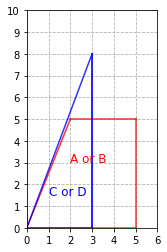

In [36]:
# グラフを描画
plt.plot((0,5), (0,0), color='red', alpha=0.8)
plt.plot((2,5), (5,5), color='red', alpha=0.8)
plt.plot((2,0), (5,0), color='red', alpha=0.8)
plt.plot((5,5), (5,0), color='red', alpha=0.8)
plt.plot((0,3), (0,0), color='blue', alpha=0.8)
plt.plot((3,3), (0,8), color='blue', alpha=0.8)
plt.plot((3,3), (0,8), color='blue', alpha=0.8)
plt.plot((3,0), (8,0), color='blue', alpha=0.8)
#plt.plot((0,3), (0,0), color='blue', alpha=0.8, ls='dashed')
#plt.plot((3,3), (0,8), color='blue', alpha=0.8, ls='dashed')
#plt.plot((3,3), (0,8), color='blue', alpha=0.8, ls='dashed')
#plt.plot((3,0), (8,0), color='blue', alpha=0.8, ls='dashed')
plt.text(2, 3, "A or B", color='red', size=12)
plt.text(1, 1.5, "C or D", color='blue', size=12)

plt.xticks(np.arange(0,10+1))
plt.yticks(np.arange(0,10+1))
plt.xlim(0,6)
plt.ylim(0,10)
ax = plt.gca()
ax.set_aspect('equal')
ax.grid(ls='dashed')
#plt.axvline(x=5, ymin=0, ymax=5, color='red')

# 問題10

紙の厚さを$t[m]$とする。
1回紙を切って重ねることで、紙の枚数は2倍される。
1回目：1枚を切って2枚になる
2回目：2枚を切って4枚になる
3回目：4枚を切って8枚になる
これを繰り返すと
$$
\begin{align}
t \times 2 =& 2t \\
2t \times 2 =& 4t \\
4t \times 2 =& 8t \\
8t \times 2 =& 16t \\
16t \times 2 =& 32t \\
\vdots
\end{align}
$$
この計算を繰り返すと、42回目で地球と月の距離を超えることができる

In [43]:
def paper_thickness(thickness=0.1E-3):
    i = 0
    while True:
        yield thickness * 2 ** i
        i += 1

In [52]:
thickness = paper_thickness() 
limit = 384400 * 1E3 #[km] --> [m]
for i, thick in enumerate(thickness):
    if thick < limit:
        print("{0:d} : {1:.8f}".format(i, thick))
    elif thick >= limit:
        print("{0:d} : {1:.8f}".format(i, thick))
        break
        
            

0 : 0.00010000
1 : 0.00020000
2 : 0.00040000
3 : 0.00080000
4 : 0.00160000
5 : 0.00320000
6 : 0.00640000
7 : 0.01280000
8 : 0.02560000
9 : 0.05120000
10 : 0.10240000
11 : 0.20480000
12 : 0.40960000
13 : 0.81920000
14 : 1.63840000
15 : 3.27680000
16 : 6.55360000
17 : 13.10720000
18 : 26.21440000
19 : 52.42880000
20 : 104.85760000
21 : 209.71520000
22 : 419.43040000
23 : 838.86080000
24 : 1677.72160000
25 : 3355.44320000
26 : 6710.88640000
27 : 13421.77280000
28 : 26843.54560000
29 : 53687.09120000
30 : 107374.18240000
31 : 214748.36480000
32 : 429496.72960000
33 : 858993.45920000
34 : 1717986.91840000
35 : 3435973.83680000
36 : 6871947.67360000
37 : 13743895.34720000
38 : 27487790.69440000
39 : 54975581.38880000
40 : 109951162.77760001
41 : 219902325.55520001
42 : 439804651.11040002
